**Probelm Statement: A global financial company wants to develop an intelligent system employing data science and machine learning to automate the categorization of individuals into specific credit score brackets. Firstly, it seeks to alleviate the manual effort involved in credit assessment, optimizing operational processes. Secondly, it aims to enable more tailored financial services by precisely classifying customers based on their creditworthiness.**

**Goal: Banks and credit card companies calculate your credit score to determine your creditworthiness. It helps banks and credit card companies immediately to issue loans to customers with good creditworthiness. 
There are three credit scores that banks and credit card companies use to label their customers:
Good,Standard,Poor . A person with a good credit score will get loans from any bank and financial institution. The credit scoring model evaluates various factors, including payment history, credit utilization, length of credit history, types of credit accounts, and recent credit inquiries.**

In [1]:
#Importing necessary python libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset to python environment 

In [3]:
df= pd.read_csv("credit.csv")

In [4]:
data=df.copy() #Copying dataset so that changes are not reflected in original dataset

In [5]:
data.head(20) #Displaying first few rows of dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [6]:
data.tail(20) #Displaying last few rows of dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99980,155602,44897,5,Chris Wickhamm,49.0,133167738.0,Writer,37188.10,3097.008333,1.0,...,Good,620.64,27.495263,361.0,No,84.205949,42.935566,Low_spent_Small_value_payments,396.997157,Standard
99981,155603,44897,6,Chris Wickhamm,50.0,133167738.0,Writer,37188.10,3097.008333,1.0,...,Good,620.64,37.753013,362.0,NM,84.205949,42.935566,Low_spent_Small_value_payments,368.154976,Good
99982,155604,44897,7,Chris Wickhamm,50.0,133167738.0,Writer,37188.10,3097.008333,1.0,...,Good,620.64,38.850680,363.0,No,84.205949,42.935566,Low_spent_Small_value_payments,412.669312,Good
99983,155605,44897,8,Chris Wickhamm,50.0,133167738.0,Writer,37188.10,3097.008333,1.0,...,Good,620.64,39.300980,364.0,No,84.205949,42.935566,High_spent_Medium_value_payments,432.559318,Good
99984,155610,34304,1,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,22.895966,68.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,328.655224,Poor
99985,155611,34304,2,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,39.772607,69.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,273.750662,Poor
99986,155612,34304,3,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,24.713861,70.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,345.743101,Poor
99987,155613,34304,4,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,30.614953,71.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,328.301277,Standard
99988,155614,34304,5,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,28.508250,72.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,208.047884,Standard
99989,155615,34304,6,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,33.359987,73.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,307.659291,Standard


In [7]:
data.shape #displaying the total columns and rows in dataset

(100000, 28)

In [8]:
data.columns #displaying each column features

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:
data.info() #displaying baisc info like data types and Non -Null count of each features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [10]:
data.nunique() #displaying unique value counts in each feature

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [11]:

data["Name"].value_counts() #value count of categorical feature "Name"

Jessicad              48
Langep                48
Stevex                48
Vaughanl              40
Ronald Groverk        40
                      ..
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Valentina Zan          8
Nicks                  8
Name: Name, Length: 10128, dtype: int64

In [12]:
data["Occupation"].value_counts() #value count of categorical feature "Occupation"

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [13]:
data["Type_of_Loan"].value_counts() # value count of categorical feature type of loan

No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

In [14]:
data["Credit_Mix"].value_counts() # value count of column feature Credit Mix

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [15]:
data["Payment_of_Min_Amount"].value_counts() # value count of feature Payment of Minimum Amount

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [16]:
data["Payment_Behaviour"].value_counts() # value count of feature Payment behaviour

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

In [17]:
data["Credit_Score"].value_counts() # value count of  target feature "credit score"

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

# Exploratory Data Analysis

In [18]:
data.describe() #Baisc descriptive statistics of Numerical features

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [19]:
data.describe(include ="all") ##Baisc descriptive statistics including all , both categorical and numerical features

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,...,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,NaN,NaN,NaN,10128,NaN,NaN,15,NaN,NaN,NaN,...,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,Jessicad,NaN,NaN,Lawyer,NaN,NaN,NaN,...,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,48,NaN,NaN,7096,NaN,NaN,NaN,...,45848,NaN,NaN,NaN,52326,NaN,NaN,28616,NaN,53174
mean,80631.500000,25982.666640,4.500000,NaN,33.316340,5.004617e+08,NaN,50505.123449,4197.270835,5.368820,...,NaN,1426.220376,32.285173,221.220460,NaN,107.699208,55.101315,NaN,392.697586,NaN
std,43301.486619,14340.543051,2.291299,NaN,10.764812,2.908267e+08,NaN,38299.422093,3186.432497,2.593314,...,NaN,1155.129026,5.116875,99.680716,NaN,132.267056,39.006932,NaN,201.652719,NaN
min,5634.000000,1006.000000,1.000000,NaN,14.000000,8.134900e+04,NaN,7005.930000,303.645417,0.000000,...,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,43132.750000,13664.500000,2.750000,NaN,24.000000,2.451686e+08,NaN,19342.972500,1626.594167,3.000000,...,NaN,566.072500,28.052567,144.000000,NaN,29.268886,27.959111,NaN,267.615983,NaN
50%,80631.500000,25777.000000,4.500000,NaN,33.000000,5.006886e+08,NaN,36999.705000,3095.905000,5.000000,...,NaN,1166.155000,32.305784,219.000000,NaN,66.462304,45.156550,NaN,333.865366,NaN
75%,118130.250000,38385.000000,6.250000,NaN,42.000000,7.560027e+08,NaN,71683.470000,5957.715000,7.000000,...,NaN,1945.962500,36.496663,302.000000,NaN,147.392573,71.295797,NaN,463.215683,NaN


**Upon initial inspection, it was found that the dataset has 1,00,000 row entries and 28 column features. There are 27 predictor variables, both categorical and numerical variables and a target variable named “credit score” which is categorical. There are three credit scores that banks and credit card companies use to label their customers: good, standard and bad. Out of the 27 predictor variables, six are found to be categorical character variables, and rest are numerical variables. From inspecting statistical summary, it is found that the dataset doesn’t have any null values and genuine outliers.**

In [20]:
data[['Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Type_of_Loan']] 

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan
0,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
...,...,...,...,...,...
99995,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan"
99996,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan"
99997,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan"
99998,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan"


# Python Type conversion

In [21]:
data["Age"] = data["Age"].astype(int) 
data["Num_of_Loan"] = data["Num_of_Loan"].astype(int)
data["Num_Bank_Accounts"] =data["Num_Bank_Accounts"].astype(int)
data["Credit_History_Age"] = data["Credit_History_Age"].astype(int)
data["SSN"] = data["SSN"].astype(int)
data["Num_Credit_Inquiries"] = data["Num_Credit_Inquiries"].astype(int)
data["Num_Credit_Card"] = data["Num_Credit_Card"].astype(int)

In [22]:
data.info() # basic info after type conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  int32  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int32  
 10  Num_Credit_Card           100000 non-null  int32  
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [23]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [24]:
data[["Num_Bank_Accounts","Num_Credit_Card"]]

,Num_Bank_Accounts,Num_Credit_Card
0,3,4
1,3,4
2,3,4
3,3,4
4,3,4
...,...,...
99995,4,6
99996,4,6
99997,4,6
99998,4,6


In [25]:
data["Num_Bank_Accounts"].value_counts()

6     13175
7     12999
8     12940
4     12343
5     12298
3     12107
9      5503
10     5329
1      4540
0      4417
2      4340
11        9
Name: Num_Bank_Accounts, dtype: int64

In [26]:
data["Num_Credit_Card"].value_counts()

5     18903
7     17024
6     16932
4     14362
3     13560
8      5073
10     4962
9      4753
2      2196
1      2185
11       36
0        14
Name: Num_Credit_Card, dtype: int64

# UNIVARIATE ANALYSIS

<Axes: title={'center': 'Credit Score'}>

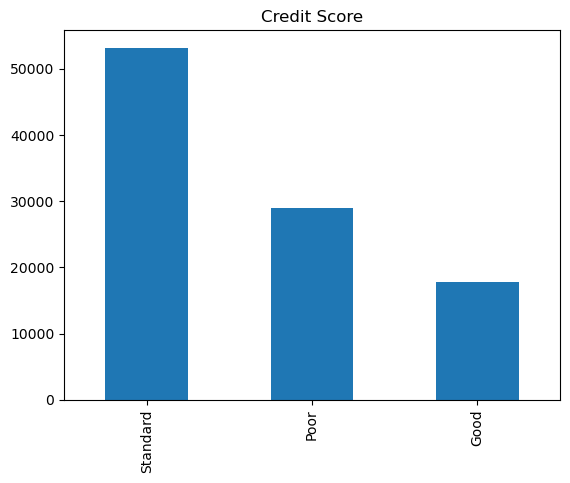

In [27]:
data['Credit_Score'].value_counts().plot.bar(title ="Credit Score") #Target feature

**The categorical feature is labelled into Standard, Poor and Good.**

**Standard :53174**

**Poor     :28998**   

**Good     :17828**

**from above dataset is imbalanced. Hence it is recommended to up-sample the data.**

<Axes: title={'center': 'Occupation'}>

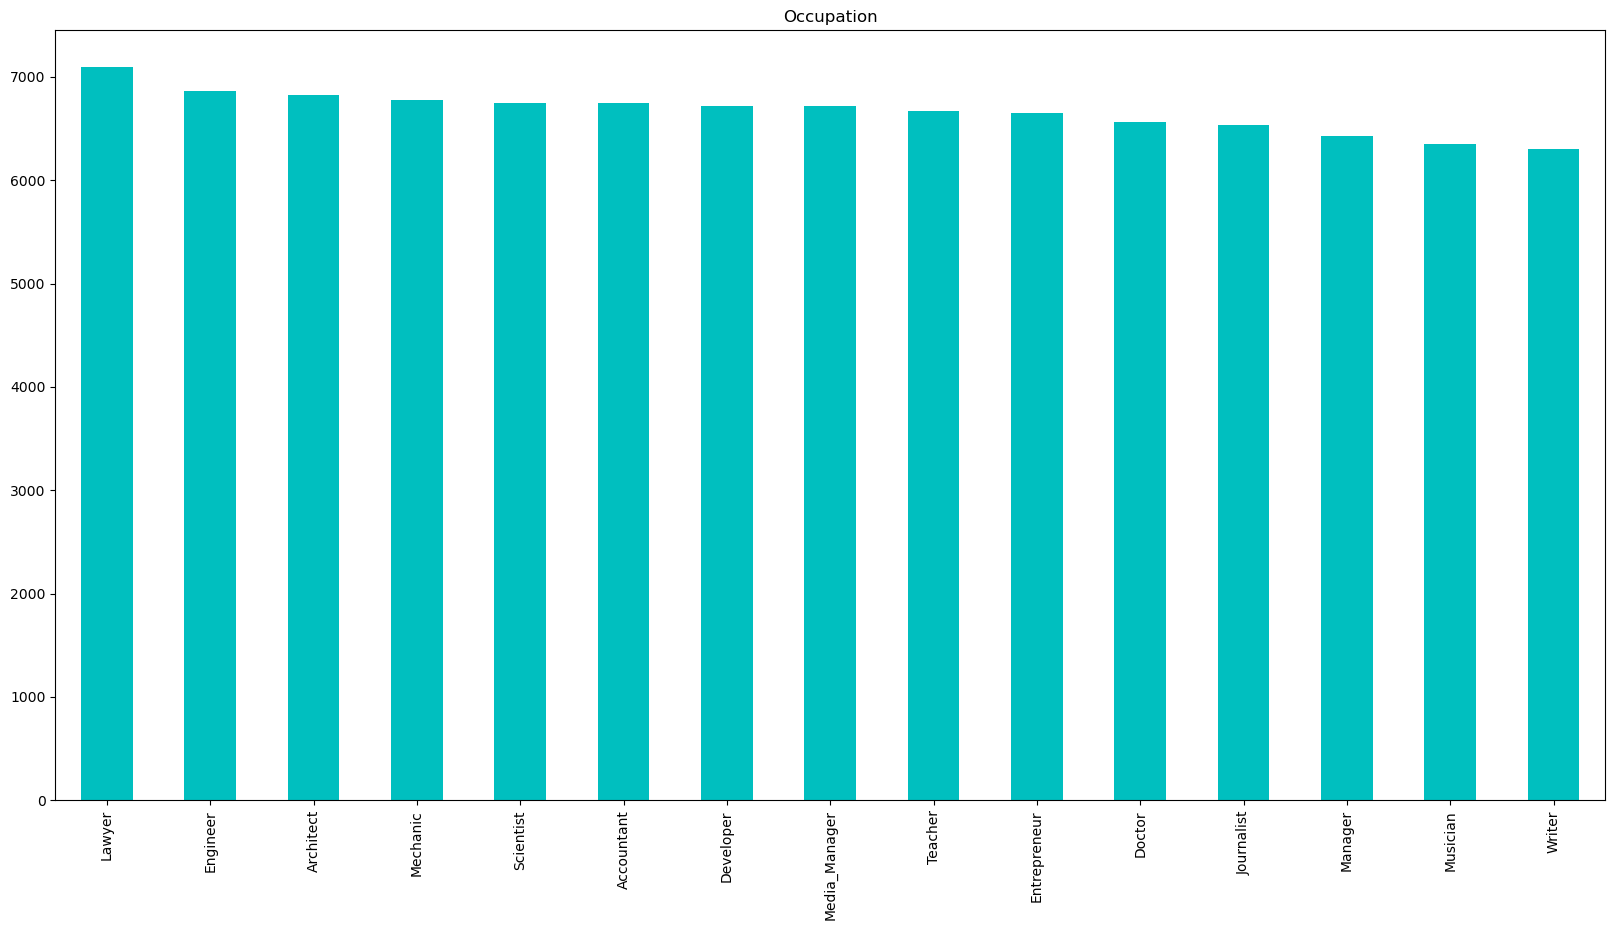

In [28]:
data["Occupation"].value_counts().plot.bar(figsize=(20,10), title= "Occupation",color='c')  #Categorical feature "Occupation"

<Axes: title={'center': 'Payment_of_Min_Amount'}>

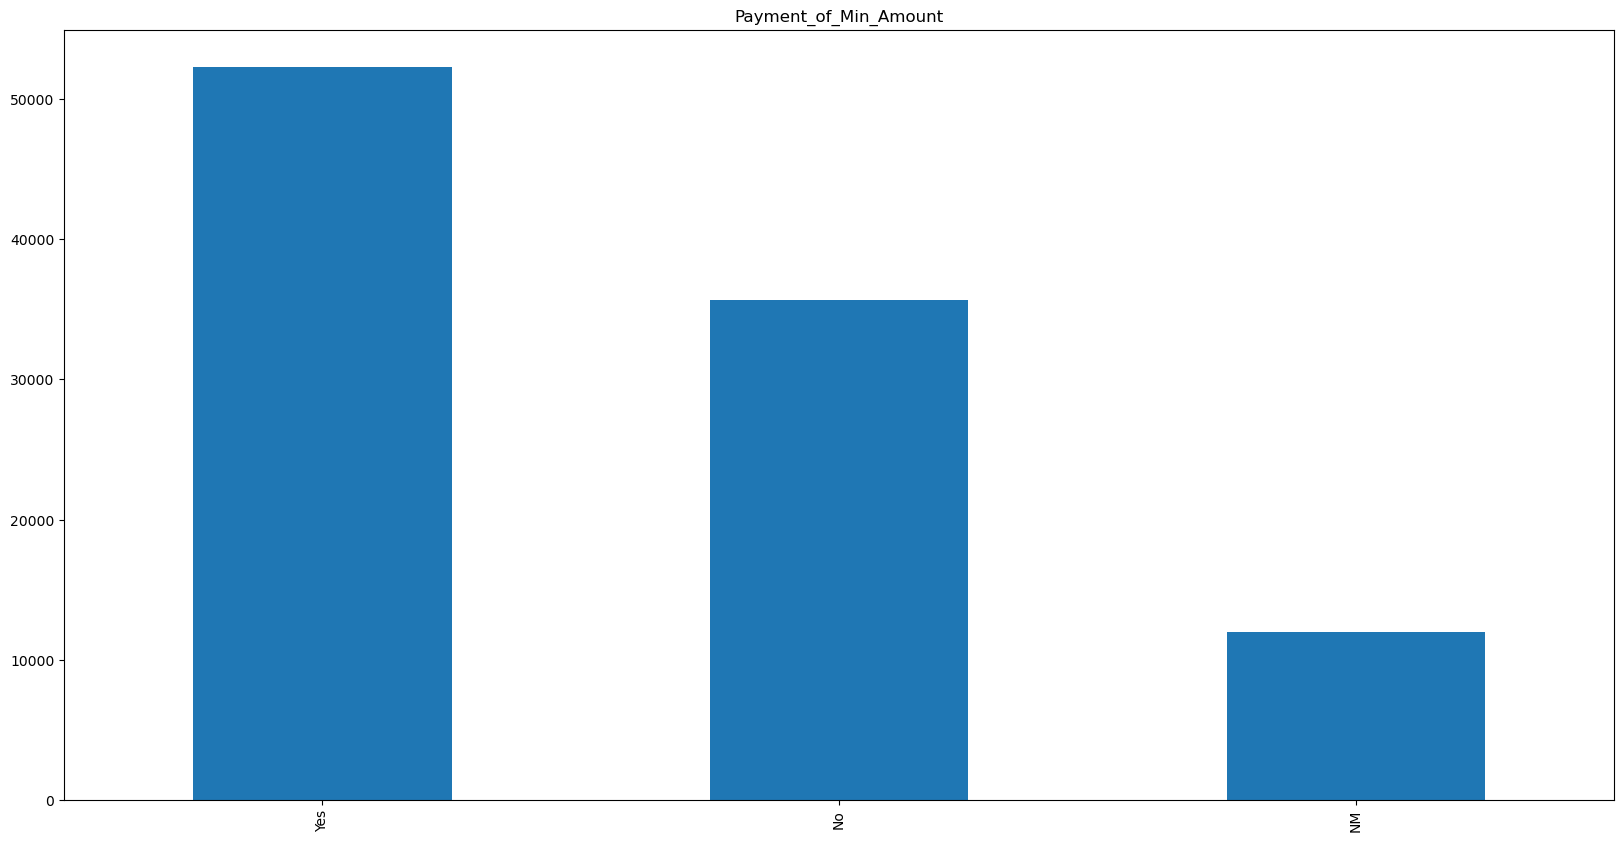

In [29]:
data["Payment_of_Min_Amount"].value_counts().plot.bar(figsize=(20,10), title= "Payment_of_Min_Amount")
#Categorical feature Payment of Minimum amount

<Axes: title={'center': 'Payment_Behaviour'}>

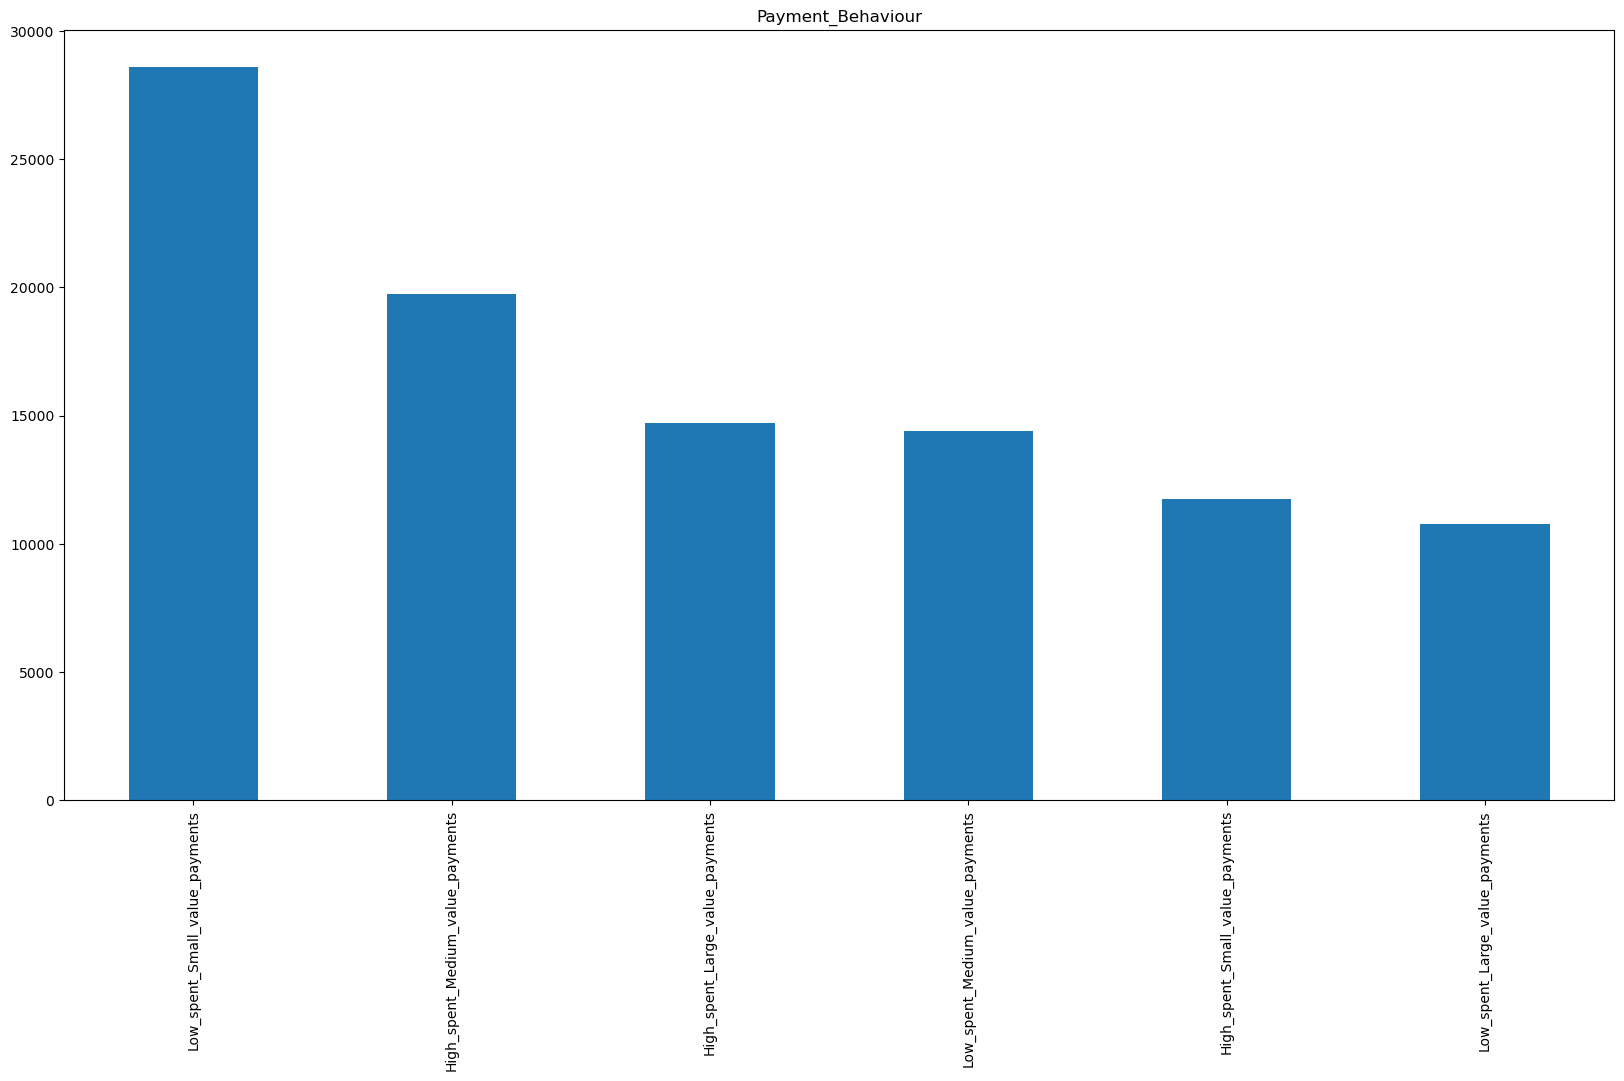

In [30]:
data["Payment_Behaviour"].value_counts().plot.bar(figsize=(20,10), title= "Payment_Behaviour")
#Categorical feature Payment Behaviour

# BIVARIATE ANALYSIS

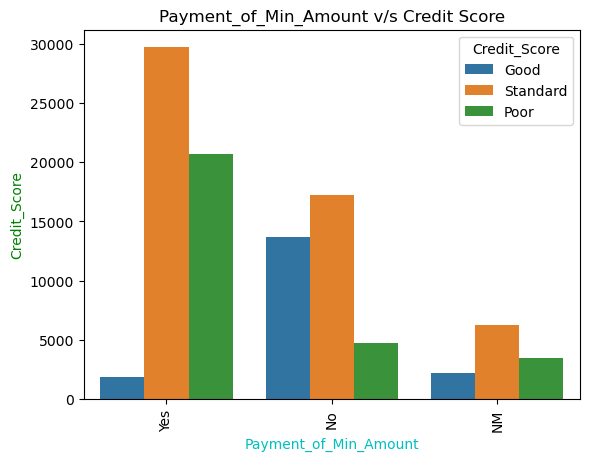

In [31]:
fig_PA= sns.countplot(data=data,x="Payment_of_Min_Amount", hue="Credit_Score",order=data['Payment_of_Min_Amount'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Payment_of_Min_Amount v/s Credit Score",c="k")
plt.xlabel("Payment_of_Min_Amount",c="c")
plt.ylabel("Credit_Score",c="g")
plt.show(fig_PA)

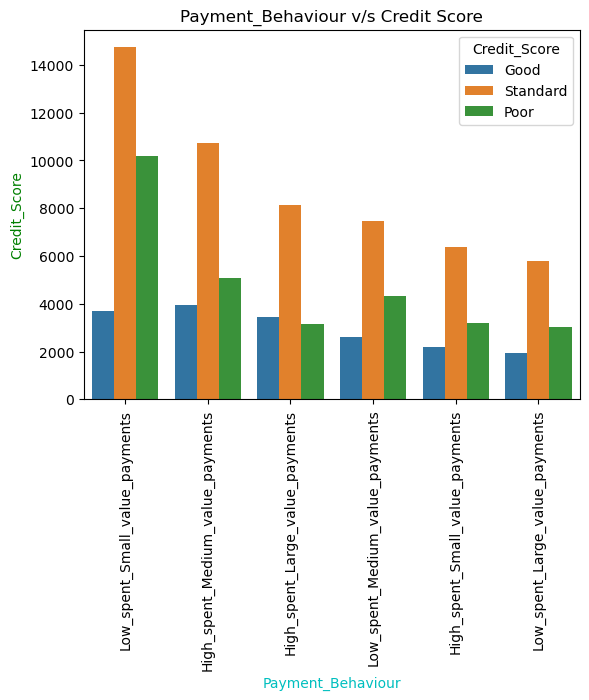

In [32]:
fig_PB =sns.countplot(data=data,x="Payment_Behaviour", hue="Credit_Score",order=data['Payment_Behaviour'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Payment_Behaviour v/s Credit Score",c="k")
plt.xlabel("Payment_Behaviour",c="c")
plt.ylabel("Credit_Score",c="g")
plt.show(fig_PB)

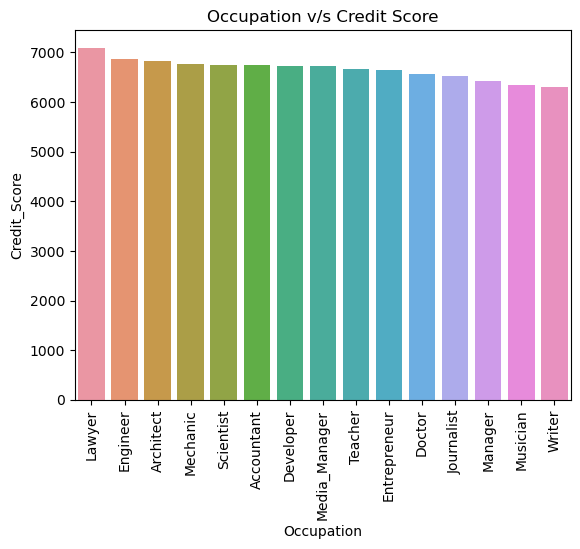

<Figure size 5000x3000 with 0 Axes>

In [33]:

fig_occ = sns.countplot(x="Occupation",data=data,order=data['Occupation'].value_counts().index)

plt.xticks(rotation=90)
plt.title("Occupation v/s Credit Score",c="k")
plt.xlabel("Occupation")
plt.ylabel("Credit_Score")
plt.figure(figsize=(50,30))
plt.show(fig_occ)

**The Occupation is labelled into 15 different profession and it is interpreted that there is no much difference in the credit scores among all occupations mentioned in the data.**

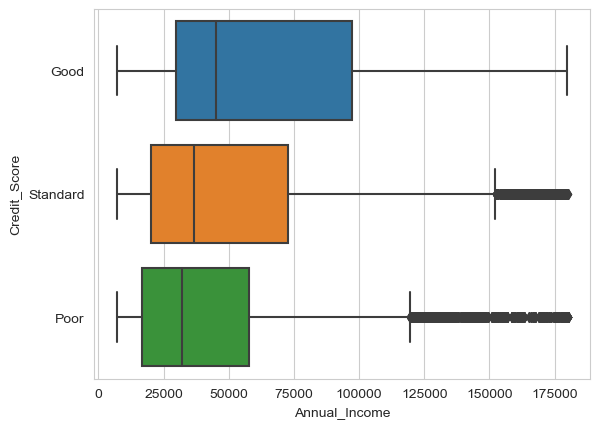

In [34]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Annual_Income", y="Credit_Score", data=data)


**the more you earn annually, the better your credit score**

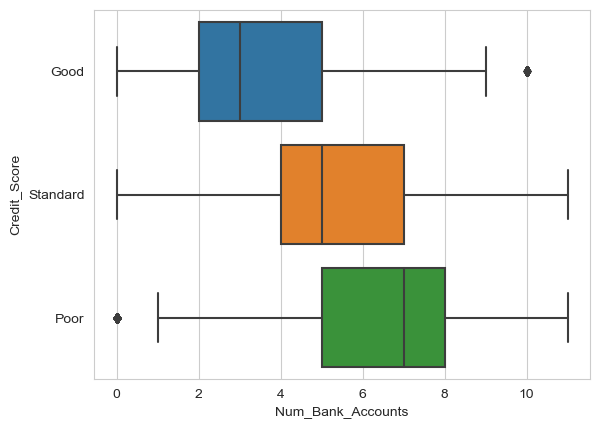

In [35]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Num_Bank_Accounts", y="Credit_Score", data=data)

**Having more bank account is not good for having a good credit score. A person should have 2 to 3 bank accounts only. So having more bank accounts doesn’t positively impact credit scores.**

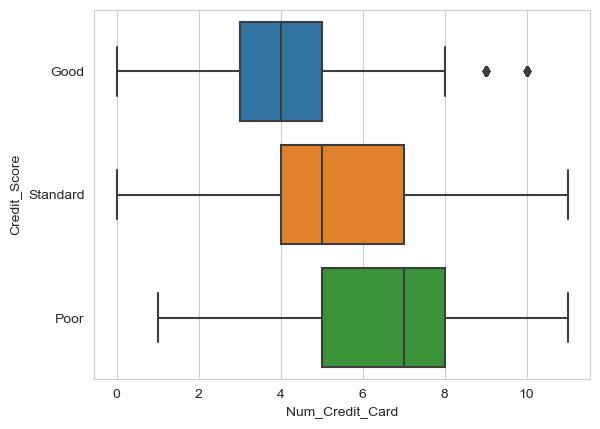

In [36]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Num_Credit_Card", y="Credit_Score", data=data)

**Having more credit card is not good for having a good credit score. A person should have 4 to 5 credit card only. So having more credit card doesn’t positively impact credit scores.**

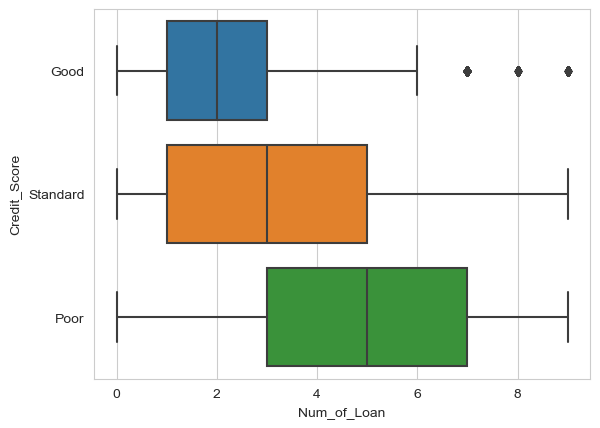

In [37]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Num_of_Loan", y="Credit_Score", data=data)

**Having more than 3 loans at a time doesnot provide a good credit score, it will negatively impact your credit scores.**

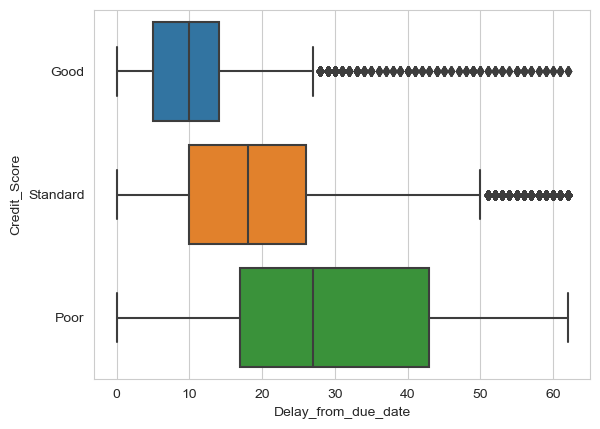

In [38]:

sns.set_style("whitegrid")
ax = sns.boxplot(x="Delay_from_due_date", y="Credit_Score", data=data)

**customer can delay your credit card payment 5 – 17 days from the due date. Delaying payments for more than 17 days from the due date will impact your credit scores negatively.**

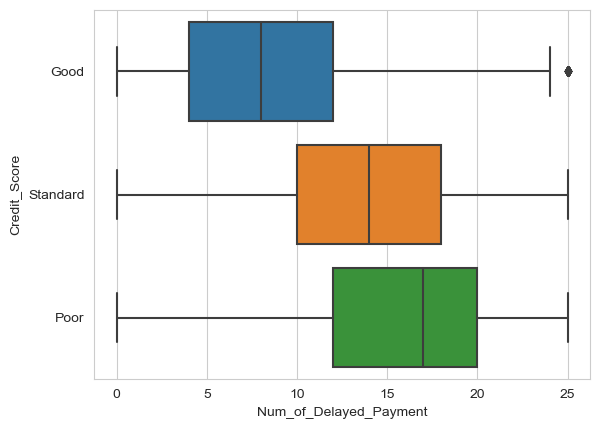

In [39]:

sns.set_style("whitegrid")
ax = sns.boxplot(x="Num_of_Delayed_Payment", y="Credit_Score", data=data)

**customer can delay number of credit card payment 4 - 14 times. Delaying payments for more than 14 times will impact your credit scores negatively.**

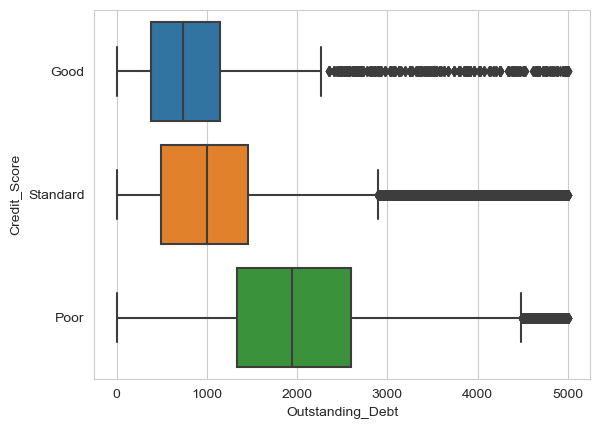

In [40]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Outstanding_Debt", y="Credit_Score", data=data)

**An outstanding debt of amount 300 – 1100 will not affect your credit scores. But always having a debt of more than amount 1100 will affect credit scores or not.**

In [41]:
data["Changed_Credit_Limit"]

0        11.27
1        11.27
2        11.27
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

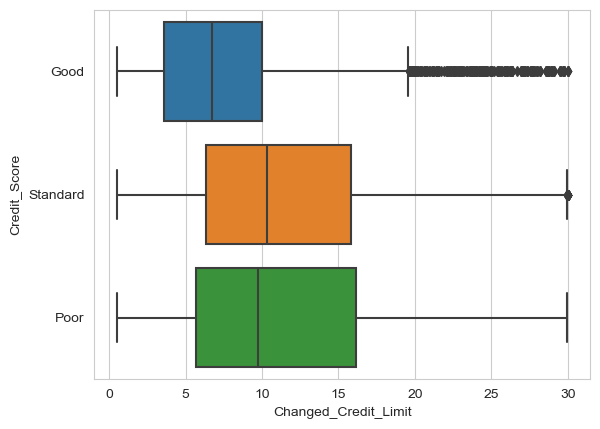

In [42]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Changed_Credit_Limit", y="Credit_Score", data=data)

**A Changed Credit Limit of $ 3 - $ 6 is favorable to your credit scores. But having credit limit of above $ 6 is not favorable.**

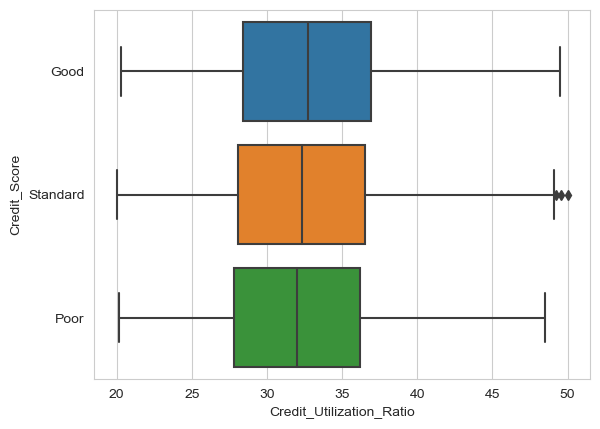

In [43]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Credit_Utilization_Ratio", y="Credit_Score", data=data)

**The Credit utilization ratio means your total debt divided by your total available credit. According to the above figure, your credit utilization ratio doesn’t affect your credit scores.**

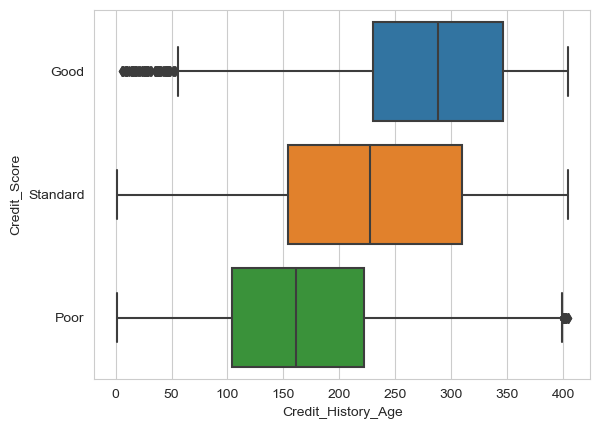

In [44]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Credit_History_Age", y="Credit_Score", data=data)

**having a long credit history result in better credit score.**

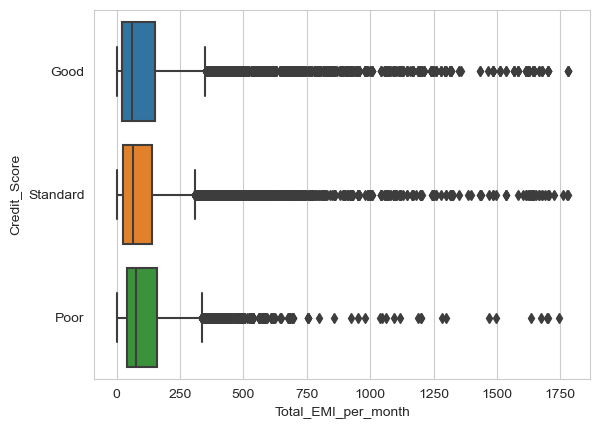

In [45]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Total_EMI_per_month", y="Credit_Score", data=data)

**The number of EMIs you are paying in a month doesn’t affect much on credit scores.**

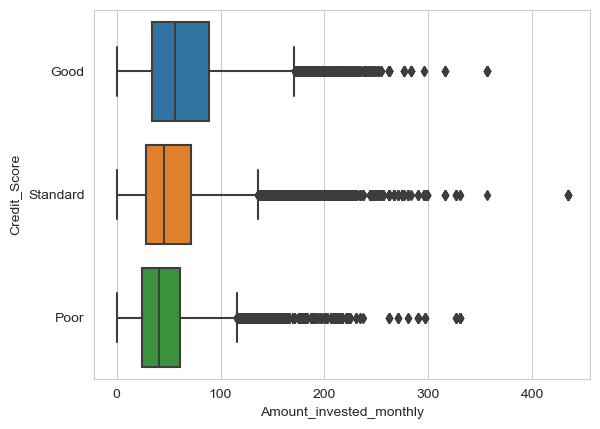

In [46]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Amount_invested_monthly", y="Credit_Score", data=data)

**the amount of money you invest monthly doesn’t affect your credit scores a lot.**

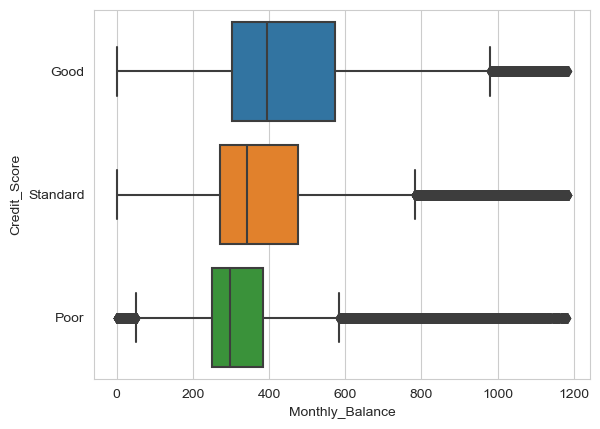

In [47]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Monthly_Balance", y="Credit_Score", data=data)

**having a high monthly balance in your account at the end of the month is good for your credit scores. A monthly balance of salary less than 250 is bad for credit scores.**

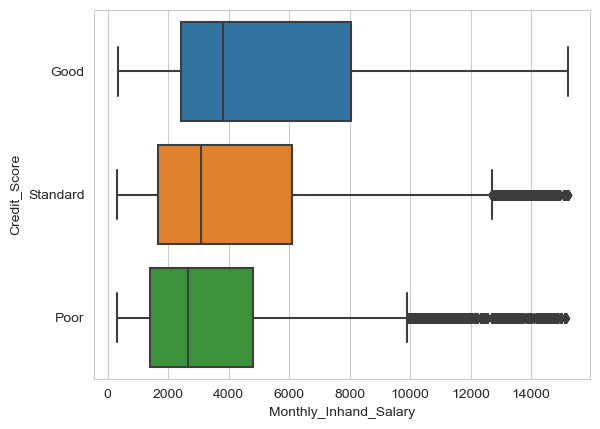

In [48]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Monthly_Inhand_Salary", y="Credit_Score", data=data)

**having the more monthly in-hand salary you earn, the better your credit score will become.**

In [49]:
sns.set_style("whitegrid")

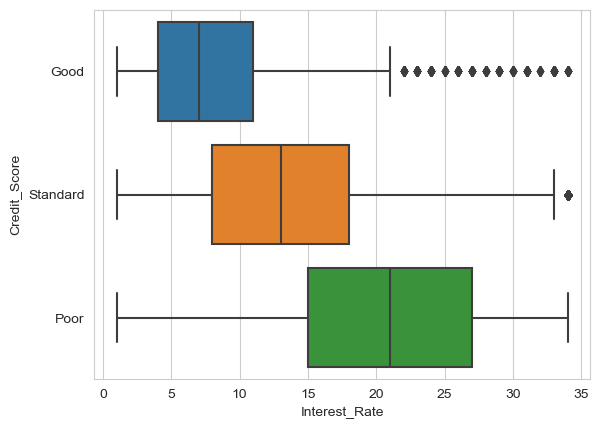

In [50]:
ax= sns.boxplot(x="Interest_Rate",y="Credit_Score",data=data)

**If the interest rate is 4 – 12.5%, the credit score is good. Having an interest rate of more than 15% is bad for your credit scores.**

C:\Users\skshe\AppData\Local\Temp\ipykernel_16508\1733382404.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

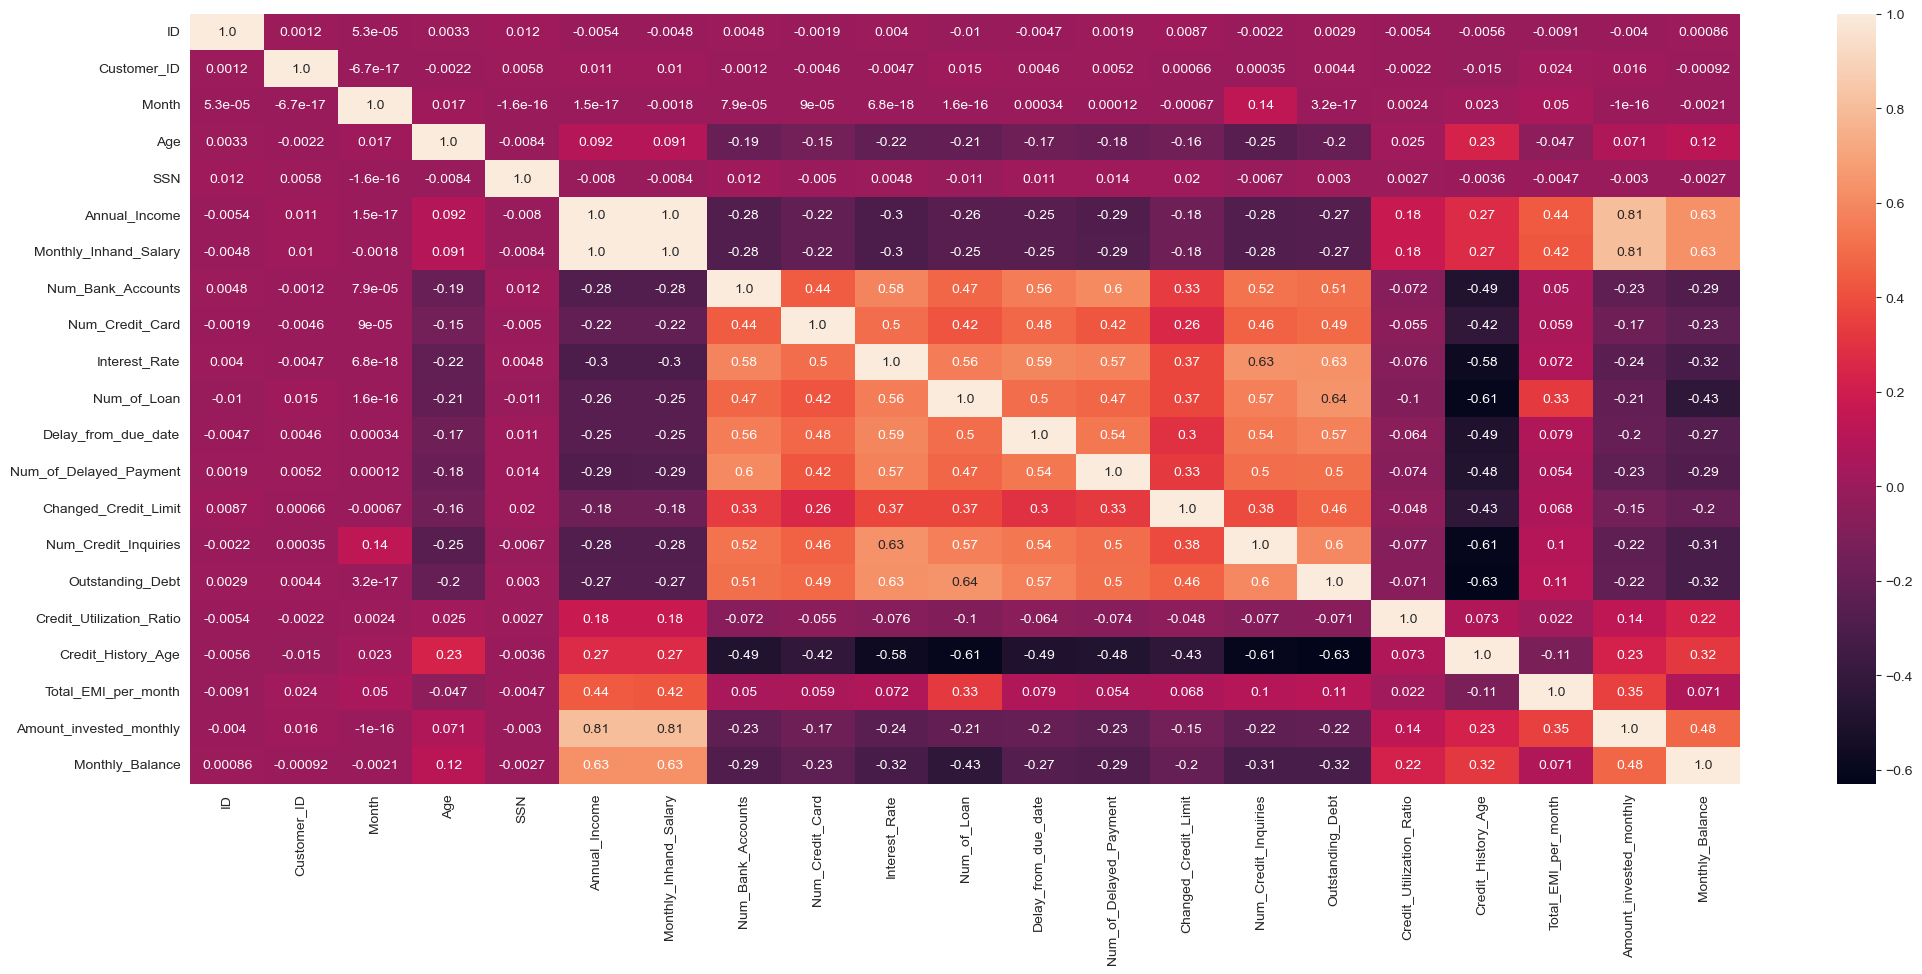

In [51]:
# Correlation matrix among features
corr = data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,fmt='.2')

**After performing EDA, Some irrelevant features like ID, Customer_ID, Type_of_loan, Amount_invested_monthy, credit utilization ratio are dropped.**

In [52]:
train=data.drop(["ID","Customer_ID","Name","Type_of_Loan","Occupation","Amount_invested_monthly","Credit_Utilization_Ratio"],axis=1) 
train

,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,821000265,19114.12,1824.843333,3,4,3.0,4,3.0,...,11.27,4,Good,809.98,265,No,49.574949,High_spent_Small_value_payments,312.494089,Good
1,2,23,821000265,19114.12,1824.843333,3,4,3.0,4,3.0,...,11.27,4,Good,809.98,266,No,49.574949,Low_spent_Large_value_payments,284.629162,Good
2,3,23,821000265,19114.12,1824.843333,3,4,3.0,4,3.0,...,11.27,4,Good,809.98,267,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good
3,4,23,821000265,19114.12,1824.843333,3,4,3.0,4,5.0,...,6.27,4,Good,809.98,268,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
4,5,23,821000265,19114.12,1824.843333,3,4,3.0,4,6.0,...,11.27,4,Good,809.98,269,No,49.574949,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,78735990,39628.99,3359.415833,4,6,7.0,2,23.0,...,11.50,3,Good,502.38,378,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,5,25,78735990,39628.99,3359.415833,4,6,7.0,2,18.0,...,11.50,3,Good,502.38,379,No,35.104023,High_spent_Medium_value_payments,496.651610,Poor
99997,6,25,78735990,39628.99,3359.415833,4,6,7.0,2,27.0,...,11.50,3,Good,502.38,380,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,7,25,78735990,39628.99,3359.415833,4,6,7.0,2,20.0,...,11.50,3,Good,502.38,381,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Month                   100000 non-null  int64  
 1   Age                     100000 non-null  int32  
 2   SSN                     100000 non-null  int32  
 3   Annual_Income           100000 non-null  float64
 4   Monthly_Inhand_Salary   100000 non-null  float64
 5   Num_Bank_Accounts       100000 non-null  int32  
 6   Num_Credit_Card         100000 non-null  int32  
 7   Interest_Rate           100000 non-null  float64
 8   Num_of_Loan             100000 non-null  int32  
 9   Delay_from_due_date     100000 non-null  float64
 10  Num_of_Delayed_Payment  100000 non-null  float64
 11  Changed_Credit_Limit    100000 non-null  float64
 12  Num_Credit_Inquiries    100000 non-null  int32  
 13  Credit_Mix              100000 non-null  object 
 14  Outstanding_Debt     

# Encoding of Data

In [54]:
from sklearn.preprocessing import LabelEncoder #preprocess the data

In [55]:
le= LabelEncoder()

In [56]:
train["Credit_Score"] = le.fit_transform(train["Credit_Score"]) #label Encoding

In [57]:
train["Payment_Behaviour"] = le.fit_transform(train["Payment_Behaviour"])

In [58]:
train["Payment_of_Min_Amount"] = le.fit_transform(train["Payment_of_Min_Amount"])

In [59]:
train["Credit_Mix"] = le.fit_transform(train["Credit_Mix"])

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Month                   100000 non-null  int64  
 1   Age                     100000 non-null  int32  
 2   SSN                     100000 non-null  int32  
 3   Annual_Income           100000 non-null  float64
 4   Monthly_Inhand_Salary   100000 non-null  float64
 5   Num_Bank_Accounts       100000 non-null  int32  
 6   Num_Credit_Card         100000 non-null  int32  
 7   Interest_Rate           100000 non-null  float64
 8   Num_of_Loan             100000 non-null  int32  
 9   Delay_from_due_date     100000 non-null  float64
 10  Num_of_Delayed_Payment  100000 non-null  float64
 11  Changed_Credit_Limit    100000 non-null  float64
 12  Num_Credit_Inquiries    100000 non-null  int32  
 13  Credit_Mix              100000 non-null  int32  
 14  Outstanding_Debt     

<Axes: >

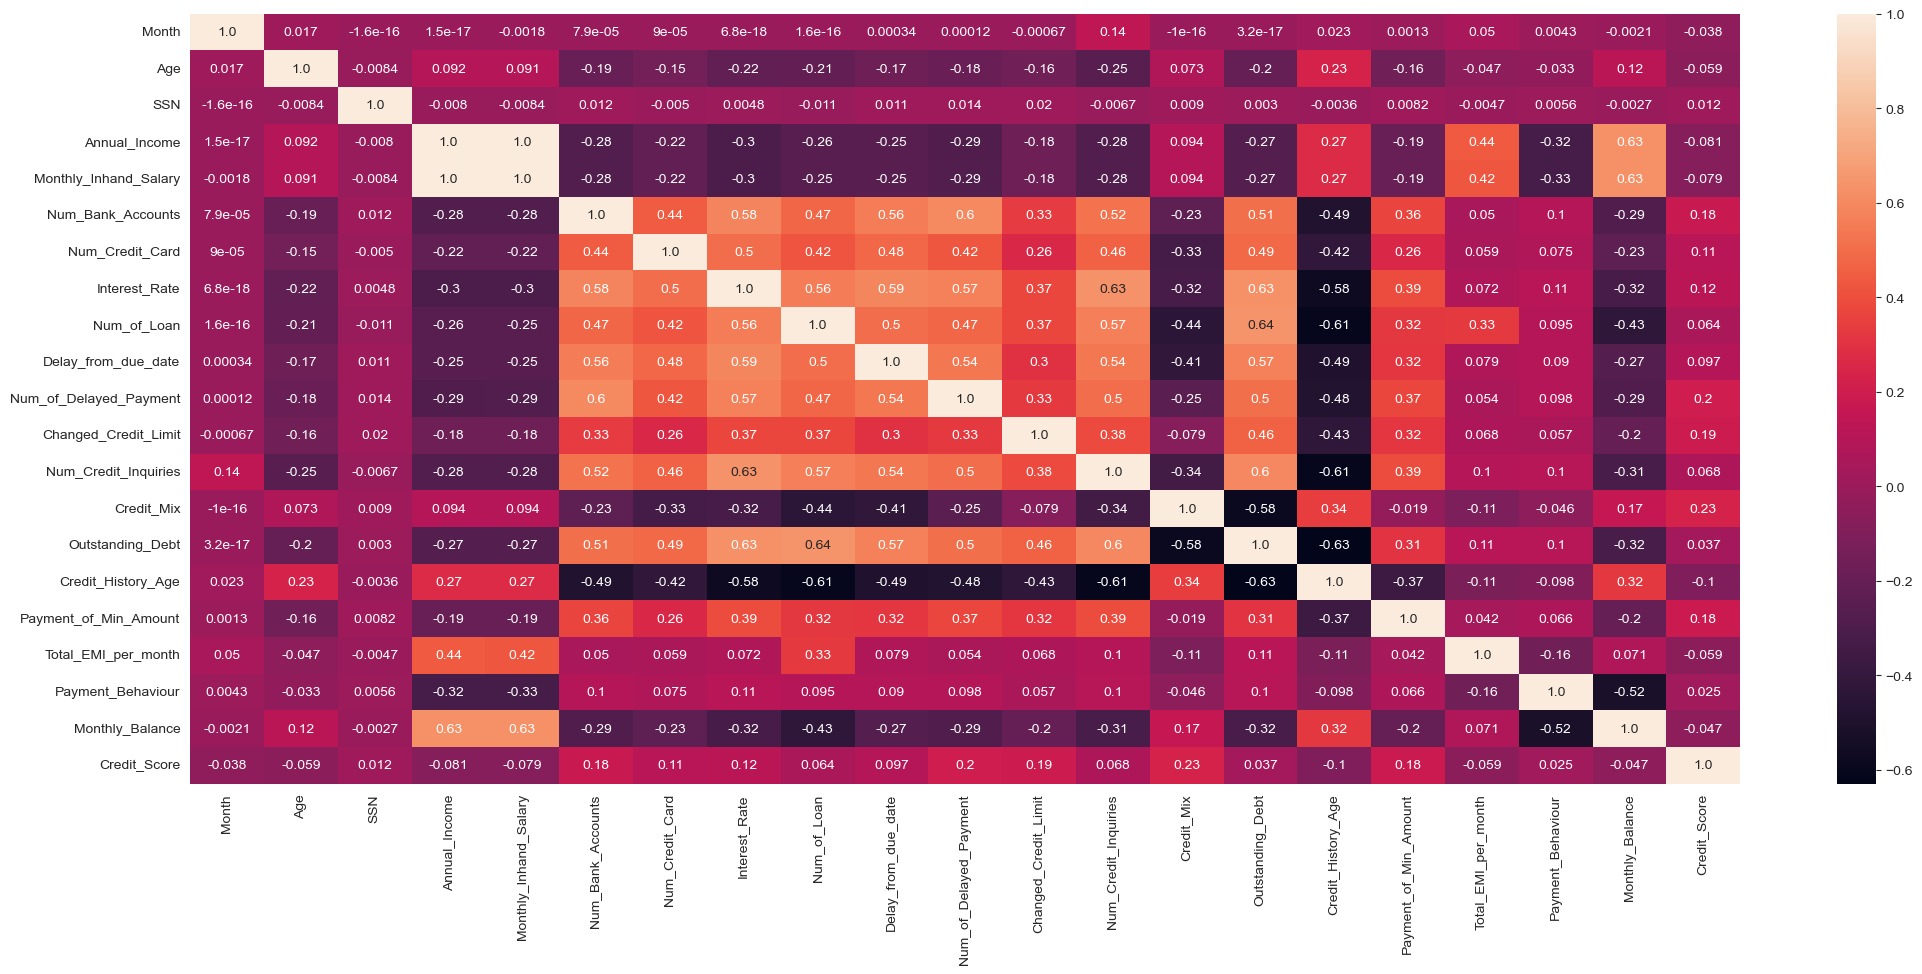

In [61]:
corr = train.corr() #correlation matrix after encoding of data to get insights on both categorical values and numerical values.
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,fmt='.2')

**from above correlation matrix Annual_Income, Monthly_Inhand_Salary are highly positively correlated, Hence retaining Annual_Income the Monthly_Inhand_Salary is dropped.**

In [62]:
X = train.drop(["Credit_Score","Monthly_Inhand_Salary"],axis=1)
Y = pd.DataFrame(train["Credit_Score"])  
Y

,Credit_Score
0,0
1,0
2,0
3,0
4,0
...,...
99995,1
99996,1
99997,1
99998,2


# Up-sampling of data 

In [63]:
from imblearn.over_sampling import SMOTE #importing necessary libraries to mitigate the imbalanced data.

In [64]:
smote = SMOTE()
X,Y = smote.fit_resample(X,Y) #over-sampling the data.

0    53174
2    53174
1    53174
Name: Credit_Score, dtype: int64


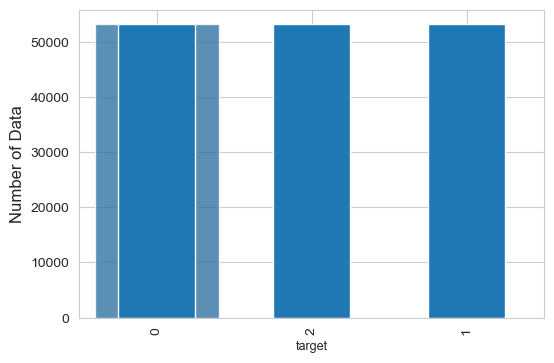

In [65]:
t = Y['Credit_Score'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(t.values,alpha=0.8)
t.plot.bar()
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
print(t)
plt.show()

# Feature Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler #Perfrom MinMax Preprocessing

In [67]:
scaler_x = MinMaxScaler()
X_scale= scaler_x.fit_transform(X)
#rescaling the range of features to scale the range in [0, 1] or [−1, 1].

In [68]:
X_scale

array([[0.        , 0.21428571, 0.8209911 , ..., 0.02786513, 0.4       ,
        0.26394144],
       [0.14285714, 0.21428571, 0.8209911 , ..., 0.02786513, 0.6       ,
        0.24040535],
       [0.28571429, 0.21428571, 0.8209911 , ..., 0.02786513, 0.8       ,
        0.27974971],
       ...,
       [0.28571429, 0.47619048, 0.92175679, ..., 0.03073114, 0.6       ,
        0.21343351],
       [0.71428571, 0.14285714, 0.8271304 , ..., 0.09165715, 0.6       ,
        0.157562  ],
       [0.57142857, 0.45238095, 0.78849437, ..., 0.05204359, 0.8       ,
        0.22498162]])

# Data Split

In [69]:
from sklearn.model_selection import train_test_split 
#Divide the data into training, validation, and testing sets for model development.

In [70]:
Y= np.squeeze(Y)  
#squeeze() function is used to remove single-dimensional entries from the shape of an array. It returns an array with the same data but reshaped dimensions.

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,Y, test_size = 0.2, random_state=42)
#Spliting the data into training and test data in the ratio 80:20 respectively.

# Feature Engineering

*Feature selection is a process that chooses a subset of features from the original features so that the feature space is optimally reduced according to a certain criterion.*

*here, based on correlation coefficient obtained, which is basically a filter technique used in feature reduction and based on the exploratory data analysis performed we choose a subset of features to be trained*

In [72]:
X.columns # the feature columns is reduced from 27 to 19 features, which is choosen to be trained.

Index(['Month', 'Age', 'SSN', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [73]:
X.shape # after upsampling and feature reduction

(159522, 19)

# Model Selection & Model Evaluation

# Classification Algorithm: Logistic Regression

In [74]:

#importing necessary libraries
from sklearn.linear_model import LogisticRegression
#Initialize Logistic Regression model.
#Model Training and optimizing their hyperparameters for improved performance.
lr = LogisticRegression(random_state=42,max_iter=5000)


In [75]:
#fit the model to the data
model = lr.fit(x_train,y_train)

In [76]:
#make predictions
y_predictions = model.predict(x_test)

In [77]:
#importing necessary libraries for model evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [78]:
confusion_matrix(y_test,y_predictions) #A confusion matrix is table that define the performance of classification algorithm. 


array([[9148,  276, 1286],
       [1544, 7194, 1840],
       [2094, 2248, 6275]], dtype=int64)

*Above matrix aids in analyzing model performance,identifying mis-classifications,and improving*
*predictive accuracy.*

In [79]:
#evaluate the model
acc_log = accuracy_score(y_test,y_predictions)
acc_log

0.708885754583921

In [80]:
print("precision =",precision_score(y_test,y_predictions,average="weighted"))

precision = 0.7077254251117256


In [81]:
print("recall =",recall_score(y_test,y_predictions,average="weighted"))

recall = 0.708885754583921


In [82]:
print("f1_score =",f1_score(y_test,y_predictions,average="weighted"))

f1_score = 0.7050534918540601


# Classification Algorithm : KNeighborsClassifier

In [83]:
#Importing necessay libraries
from sklearn.neighbors import KNeighborsClassifier

In [84]:

metric_k =[]

In [85]:
neighbors = np.arange(3,15)

In [86]:
#initialize and train the model knn classifier
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors =k, metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred_kn = classifier.predict(x_test)
    acc_kn = accuracy_score(y_test,y_pred_kn)
    metric_k.append(acc_kn)

In [87]:
metric_k

[0.8323146842187745,
 0.8157342109387243,
 0.8153267512929008,
 0.804826829650525,
 0.8047954866008462,
 0.7965209214856606,
 0.7959567465914433,
 0.7911299169409184,
 0.7884030716188685,
 0.7852060805516377,
 0.7835448989186647,
 0.7816329728882621]

# Classification Algorithm: Decision Tree Classifier

In [88]:
#importing necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [89]:
#Initialize Decision Tree Classifier model.
#Model Training
dt_cls = DecisionTreeClassifier(random_state =42)

In [90]:
#fit the model to the data
model_dt = dt_cls.fit(x_train,y_train)

In [91]:
#make predictions
y_pred_dt = model.predict(x_test)

In [92]:
confusion_matrix(y_test,y_pred_dt)

array([[9148,  276, 1286],
       [1544, 7194, 1840],
       [2094, 2248, 6275]], dtype=int64)

In [93]:
accuracy_score(y_test,y_pred_dt)

0.708885754583921

In [94]:
acc_dt = accuracy_score(y_test,y_pred_dt)

In [95]:
acc_dt

0.708885754583921

In [96]:
print("precision =",precision_score(y_test,y_pred_dt,average="weighted"))

precision = 0.7077254251117256


In [97]:
print("recall =",recall_score(y_test,y_pred_dt,average="weighted"))

recall = 0.708885754583921


In [98]:
print("f1_score =",f1_score(y_test,y_pred_dt,average="weighted"))

f1_score = 0.7050534918540601


# Classification Algorithm: Random Forest Classifier

In [99]:
#importing necessary libraries

from sklearn.ensemble import RandomForestClassifier


In [100]:
#Initialize Random Forest Classifier model.
#Model Training

rf_cls =RandomForestClassifier()

In [101]:
#fit the model to the data
model_rf = rf_cls.fit(x_train,y_train)

In [102]:
#make predicitions
y_pred_rf = model_rf.predict(x_test)

In [103]:
confusion_matrix(y_test,y_pred_rf)

array([[10245,    60,   405],
       [  167,  9893,   518],
       [ 1025,  1294,  8298]], dtype=int64)

In [104]:
acc_rf =accuracy_score(y_test,y_pred_rf)

In [105]:
acc_rf

0.8912709606644726

*Accuracy is calculated as the number of correct predictions divided by the total number of predictions made by the model.*


In [106]:
pre_rf =precision_score(y_test,y_pred_rf,average = "weighted")

In [107]:
pre_rf

0.89179041871449

*Precision tells us how many of the correctly predicted cases actually turned out to be positive.*

In [108]:
recall_rf =recall_score(y_test,y_pred_rf,average = "weighted")

In [109]:
recall_rf

0.8912709606644726

*Recall tells us how many of the actual positive cases we were able to predict correctly with our model.*

In [110]:
f1_rf =f1_score(y_test,y_pred_rf,average = "weighted")

In [111]:
f1_rf

0.889527576406971

*F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. 
It is maximum when Precision is equal to Recall.
In practice, when we try to increase the precision of our model, the recall goes down, and vice-versa.
The F1-score captures both the trends in a single value.*


# Model Performance

**Generating classification report**

*A classification report is a text summary that shows the main metrics for each class of a machine learning model. 
It includes the precision, recall, F1-score, and support for each class, 
as well as the weighted average of these metrics across all classes.*

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictions))
#report on logistic regression classifier

              precision    recall  f1-score   support

           0       0.72      0.85      0.78     10710
           1       0.74      0.68      0.71     10578
           2       0.67      0.59      0.63     10617

    accuracy                           0.71     31905
   macro avg       0.71      0.71      0.70     31905
weighted avg       0.71      0.71      0.71     31905



In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_kn))
#report on KNN classifier

              precision    recall  f1-score   support

           0       0.75      0.92      0.83     10710
           1       0.79      0.80      0.80     10578
           2       0.81      0.62      0.70     10617

    accuracy                           0.78     31905
   macro avg       0.79      0.78      0.78     31905
weighted avg       0.79      0.78      0.78     31905



In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))
#report on decision tree classifier

              precision    recall  f1-score   support

           0       0.72      0.85      0.78     10710
           1       0.74      0.68      0.71     10578
           2       0.67      0.59      0.63     10617

    accuracy                           0.71     31905
   macro avg       0.71      0.71      0.70     31905
weighted avg       0.71      0.71      0.71     31905



In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))
#report on random forest classifier

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     10710
           1       0.88      0.94      0.91     10578
           2       0.90      0.78      0.84     10617

    accuracy                           0.89     31905
   macro avg       0.89      0.89      0.89     31905
weighted avg       0.89      0.89      0.89     31905



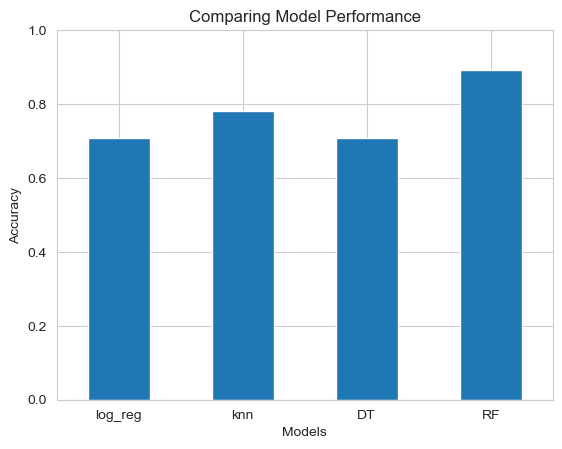

In [116]:
pd.DataFrame([acc_log,acc_kn,acc_dt,acc_rf]).plot.bar();
plt.xticks(np.arange(4),('log_reg',"knn",'DT',"RF"))
plt.legend().remove()
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation = 0)
plt.title('Comparing Model Performance');

**Among the above classification methods, RandomForest Classifier gives higher accuracy and better fit model.**